# <center>Homework 5<center> 
##### <center>ECE5554 - Virginia Tech | Author: Rebecca DeSipio | Due Date: August 10th, 2022 <center>
------------------------------------------------------

In [1]:
# import libraries
import numpy as np
import cv2

import matplotlib.pyplot as plt

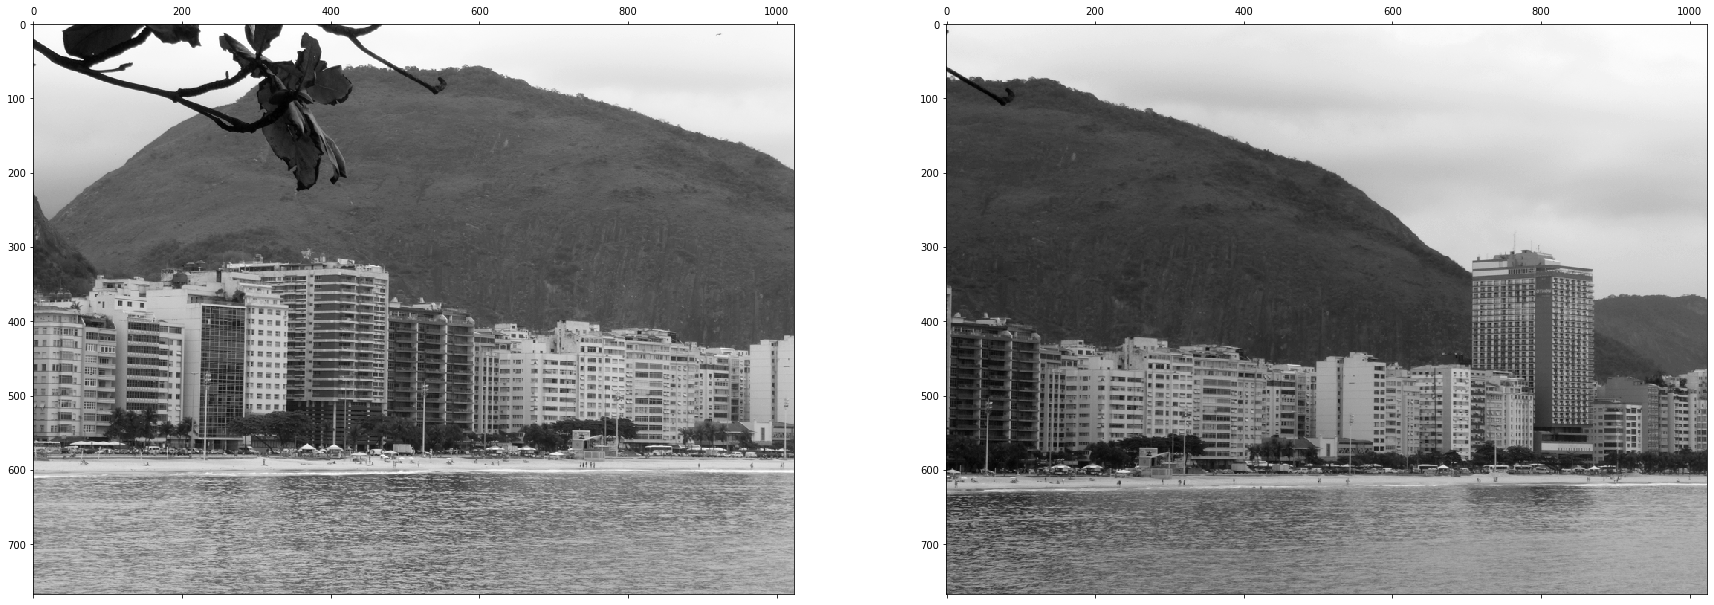

In [2]:
# -----------
## Part (a)
# -----------
# Load the images and convert to grayscale
rio0 = cv2.imread('rio-00.png').astype(np.uint8)
rio1 = cv2.imread('rio-01.png').astype(np.uint8)
rio2 = cv2.imread('rio-02.png').astype(np.uint8)

rio0_gray = ((rio0.astype(np.float32)[:,:,2] + rio0.astype(np.float32)[:,:,1] + rio0.astype(np.float32)[:,:,0]) / 3).astype(np.uint8)
rio1_gray = ((rio1.astype(np.float32)[:,:,2] + rio1.astype(np.float32)[:,:,1] + rio1.astype(np.float32)[:,:,0]) / 3).astype(np.uint8)
rio2_gray = ((rio2.astype(np.float32)[:,:,2] + rio2.astype(np.float32)[:,:,1] + rio2.astype(np.float32)[:,:,0]) / 3).astype(np.uint8)

fig1, (ax1, ax2) = plt.subplots(1,2,figsize=(30, 20))
ax1.matshow(rio0_gray, cmap='gray')
ax2.matshow(rio1_gray, cmap='gray')

In [3]:
# -----------
## Part (b)
# -----------
# Implement the image stitching process

# ----------------
## STEP 1
# Detect keypoints in the image and characterize them
siftRio0 = cv2.SIFT_create()
siftRio1 = cv2.SIFT_create()

kpRio0, desRio0 = siftRio0.detectAndCompute(rio0_gray, None)
kpRio1, desRio1 = siftRio0.detectAndCompute(rio1_gray, None)

# draw keypoints to visualize
# kpImg_rio0 = cv2.drawKeypoints(rio0_gray.astype(np.uint8), kpRio0, rio0)
# kpImg_rio1 = cv2.drawKeypoints(rio1_gray.astype(np.uint8), kpRio1, rio1)


# kpImg_rio2 = cv2.drawKeypoints(rio2_gray.astype(np.uint8), kpRio2, rio2.astype(np.uint8))
# cv2.imshow('kpImg_rio0.png', kpImg_rio0)
# cv2.waitKey()
# cv2.imshow('kpImg_rio0.png', kpImg_rio1)
# cv2.waitKey()
# cv2.imshow('kpImg_rio0.png', kpImg_rio2)
# cv2.waitKey()
# ----------------

In [4]:
# ----------------
## STEP 2
# Match the keypoints in the first two images
bfRio01 = cv2.BFMatcher()
matchesRio01 = bfRio01.match(desRio0, desRio1)
# ----------------

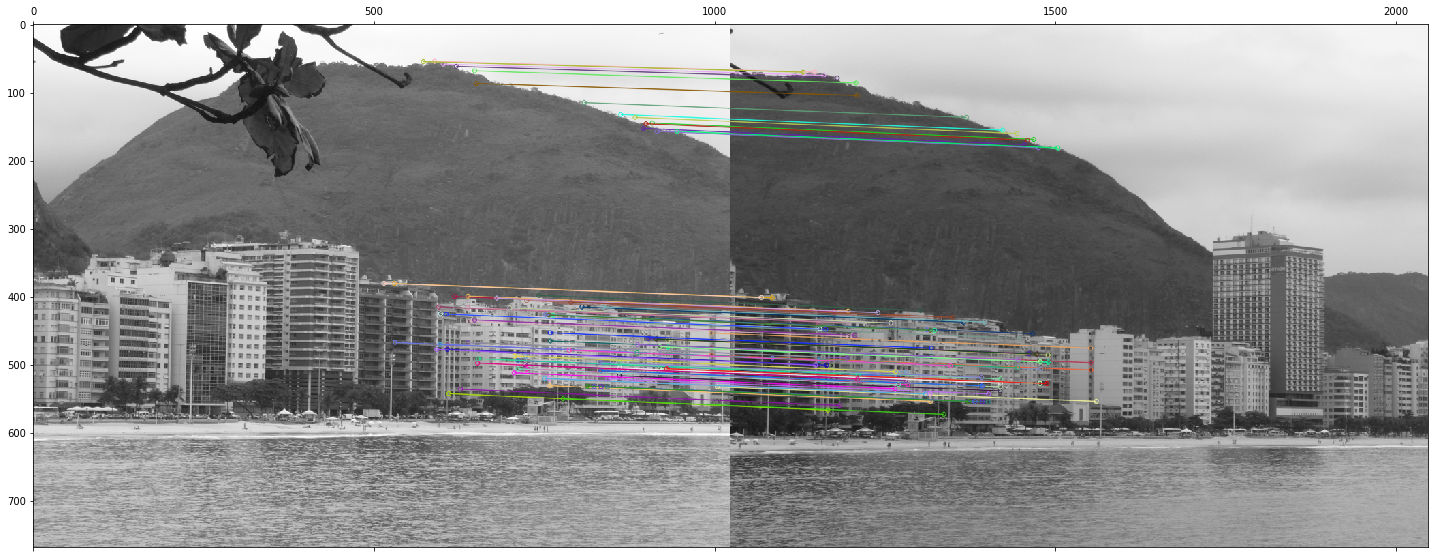

In [5]:
# ----------------
## STEP 3
# Sort the matches to keep only the best one
matchesRio01 = sorted(matchesRio01, key=lambda x:x.distance)

rio0idx = []
rio1idx = []
for i in range(100):
    temp0idx = matchesRio01[i].queryIdx # rio0
    temp1idx = matchesRio01[i].trainIdx # rio1

    rio0idx.append(cv2.KeyPoint_convert(kpRio0)[temp0idx])
    rio1idx.append(cv2.KeyPoint_convert(kpRio1)[temp1idx])


rio0idx = np.array(rio0idx)
rio1idx = np.array(rio1idx)

# print('rio0: \n', rio0idx, '\n', 'rio1: \n',rio1idx)
# Draw the first 5 matches
rio01_matchesImg = cv2.drawMatches(rio0, kpRio0, rio1, kpRio1, matchesRio01[:100], None, flags=2)
# cv2.imwrite('rio01_matchesImg.png', rio01_matchesImg)

# fig2, (ax1, ax2) = plt.subplots(1,2,figsize=(30, 20))
# ax1.matshow(kpImg_rio0)
# ax2.matshow(kpImg_rio1)
fig2, (ax1) = plt.subplots(1,1,figsize=(25, 25))
ax1.matshow(rio01_matchesImg)
# ----------------

In [18]:
# ----------------
## STEP 4
# Find the geometric mapping from image 1 to image 2 
h_rio01, status_rio01 = cv2.findHomography(rio1idx, rio0idx)
# ----------------

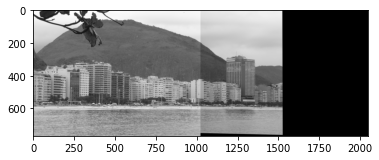

In [20]:
# ----------------
## STEP 5
# Transform the second image to lie in the coords of the first
rio1out = cv2.warpPerspective(rio1, h_rio01, (rio1.shape[1]+rio0.shape[1], rio1.shape[0]))
rio1out[0:rio1.shape[0], 0:rio1.shape[1]] = rio0

plt.imshow(rio1out)
# ----------------

In [21]:
# REPEAT WITH IMAGE 3
# convert the image to grayscale
rio01_gray = ((rio1out.astype(np.float32)[:,:,2] + rio1out.astype(np.float32)[:,:,1] + rio1out.astype(np.float32)[:,:,0]) / 3).astype(np.uint8)

# detect keypoints using sift
siftRio01 = cv2.SIFT_create()
siftRio2 = cv2.SIFT_create()
kpRio01, desRio01 = siftRio0.detectAndCompute(rio01_gray, None)
kpRio2, desRio2 = siftRio0.detectAndCompute(rio2_gray, None)

# match keypoints
bfRio012 = cv2.BFMatcher()
matchesRio012 = bfRio012.match(desRio2, desRio01)

# sort matches
matchesRio012 = sorted(matchesRio012, key=lambda x:x.distance)

# find the geometric mapping
rio01idx = []
rio2idx = []
for i in range(100):
    temp0idx = matchesRio012[i].queryIdx # rio0
    temp1idx = matchesRio012[i].trainIdx # rio1

    rio01idx.append(cv2.KeyPoint_convert(kpRio01)[temp0idx])
    rio2idx.append(cv2.KeyPoint_convert(kpRio2)[temp1idx])


rio01idx = np.array(rio01idx)
rio2idx = np.array(rio2idx)

h_rio012, status_rio012 = cv2.findHomography(rio2idx, rio01idx)

# tranform the second image to lie in the coordinates of the first
rio2out = cv2.warpPerspective(rio2, h_rio012, (rio2.shape[1]+rio01.shape[1], rio2.shape[0]))

# combine the images
rio2out[0:rio2.shape[0], 0:rio2.shape[1]] = rio01
plt.imshow(rio2out)

IndexError: index 7185 is out of bounds for axis 0 with size 3483